In [15]:
import pandas as pd
import numpy as np

# data viz
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

plt.style.use('fivethirtyeight')

import os
import datetime

import set_config

In [16]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))
print ("dir_race is %s" % (dir_race))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/
dir_race is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data


In [17]:
filename = 'oee_extracts_all_sites.xlsx'
path = os.path.join(dir_sanofi_share, filename)
df = pd.read_excel(path, na_values=('-'))

In [18]:
df.dropna(subset={'Week'}, inplace=True)
df[['OEE %','Changeover','Availability %','Performance %']] = df[['OEE %','Changeover','Availability %','Performance %']].mul(100)

In [19]:
df['WeekOfYear'] = pd.to_numeric(df['Week'].str[1:3])
df['Year'] = pd.to_numeric(df['Week'].str[4:])
dates = df.Year*100+df.WeekOfYear
df['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df.head()

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,51.963834,6.991830,0.211838,71.102124,73.083378,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,35.919900,6.247921,0.470711,47.417234,76.242102,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,3.129890,0.000000,0.000000,100.000000,3.129890,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,39.046651,13.997290,0.296680,60.164860,64.967799,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,15.830116,8.909910,0.137793,70.655405,22.404678,1,2020,2020-01-12


In [20]:
df.dropna(subset=['WeekOfYear'], inplace=True)
df
# df

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,51.963834,6.991830,0.211838,71.102124,73.083378,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,35.919900,6.247921,0.470711,47.417234,76.242102,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,3.129890,0.000000,0.000000,100.000000,3.129890,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,39.046651,13.997290,0.296680,60.164860,64.967799,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,15.830116,8.909910,0.137793,70.655405,22.404678,1,2020,2020-01-12
...,...,...,...,...,...,...,...,...,...,...
8935,W53-2020,TRS - L19 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8936,W53-2020,TRS - L21 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8937,W53-2020,TRS - L22 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8938,W53-2020,TRS - L24 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10


In [21]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [22]:
rolling_avg = df.groupby('Line')[['OEE %','Performance %','Availability %']].rolling(window=4).mean().reset_index()

# keep the data after this start date
start_date = '2021-11-01'

rolling_avg = rolling_avg[rolling_avg.Date >= start_date]

# keep only the lines actively reporting OEE 
active_rolling = rolling_avg.dropna(subset={'OEE %'}).copy()

In [23]:
print ("Number of Unique Plants/Factories: {}".format(len(rolling_avg.Line.str[:3].unique())))
print ("Number of Unique Lines: {}".format(len(rolling_avg.Line.unique())))
print ("Number of Unique Lines recording OEE % values: {}".format(len(rolling_avg[rolling_avg['OEE %'] > 0].Line.unique())))

Number of Unique Plants/Factories: 19
Number of Unique Lines: 231
Number of Unique Lines recording OEE % values: 169


In [24]:
#  create a Plant column from first 3 chars of Line - will do properly later
active_rolling['Plant'] = active_rolling.Line.str[:3]
active_rolling

,Line,Date,OEE %,Performance %,Availability %,Plant
23,ELB - Extraction B12 1st cycle,2021-11-07,79.533013,172.574119,47.490781,ELB
24,ELB - Extraction B12 1st cycle,2021-11-14,82.036803,154.393102,53.593807,ELB
25,ELB - Extraction B12 1st cycle,2021-11-21,85.537994,158.633616,54.358192,ELB
26,ELB - Extraction B12 1st cycle,2021-11-28,71.608727,103.289031,32.086806,ELB
27,ELB - Extraction B12 1st cycle,2021-12-05,57.727023,57.620507,-0.790096,ELB
...,...,...,...,...,...,...
8909,WAT - LYO Packaging Line 9,2021-11-14,16.698821,76.916378,29.012684,WAT
8910,WAT - LYO Packaging Line 9,2021-11-21,22.241672,104.153394,23.663588,WAT
8911,WAT - LYO Packaging Line 9,2021-11-28,26.462903,126.347437,22.711537,WAT
8912,WAT - LYO Packaging Line 9,2021-12-05,30.637254,164.660714,20.307421,WAT


In [25]:
metrics = ['OEE %','Availability %','Performance %']

for metric in metrics:

     fig = px.bar(active_rolling.dropna(subset=[metric]).groupby('Line').tail(1).sort_values(by=metric, ascending=False), x='Line', y=metric,
     title='Latest Rolling {} by Line'.format(metric),
     range_y=(0,100)
     )
     if metric == 'OEE %':
          fig.add_hline(y=60, line_dash='dot', 
               annotation_text='60% June 2022 Target', 
               annotation_position='bottom left')
          fig.add_hline(y=65, line_dash='dot', 
               annotation_text='65% December 2022 Target', 
               annotation_position='bottom left')
     fig.show()

for metric in metrics:

    fig = px.bar(active_rolling.dropna(subset=[metric]).groupby('Plant').mean().reset_index().sort_values(by=metric, ascending=False), 
    x='Plant', 
    y=metric, 
    title='Latest Rolling {} by Plant'.format(metric),
    range_y=(0,100) 
    )
    if metric == 'OEE %':
          fig.add_hline(y=60, line_dash='dot',
               line_color='orange', 
               annotation_text='60% June 2022 Target', 
               annotation_position='bottom left')
          fig.add_hline(y=65, line_dash='dot', 
               line_color='green',
               annotation_text='65% December 2022 Target', 
               annotation_position='top right')

    fig.show()

    

In [26]:
active_rolling.dropna(subset=[metric]).groupby('Plant').mean().sort_values(by='OEE %').reset_index()

,Plant,OEE %,Performance %,Availability %
0,MLE,22.049109,75.949353,29.766394
1,LTR,28.783970,60.525790,49.668337
2,TRS,37.921579,85.863145,43.667641
3,FRA,38.451775,73.637306,50.443717
4,SCO,38.706258,73.833074,55.289799
5,VDR,40.533685,105.792683,39.601888
6,ORI,42.517827,80.481627,50.240793
7,SUZ,45.709475,108.172889,45.920424
8,ELB,48.131669,61.685804,66.433353
9,RDG,49.287372,81.713017,60.012952


In [27]:
# sns.displot(rolling_avg[rolling_avg['OEE %'] < 4].dropna(subset=['OEE %'])['OEE %'])
fig = px.histogram(rolling_avg[rolling_avg['OEE %'] < 200].dropna(subset=['OEE %'])['OEE %']
    ,labels={'value':'OEE %'})
fig.show()

In [34]:
x = active_rolling['Availability %']
y = active_rolling['Performance %']
colors = active_rolling.Plant

fig = px.scatter(active_rolling, x=x, y=y
    , color='Plant'
    , symbol='Plant'
    , title='Availability vs Performance %'
    , range_x=(0,100)
    , range_y=(0,100)
    , width=1200
    , height=900)


def oee_line(x, target):
    y = (target/x)*100
    return y


line_x = np.linspace(.001,100,100)

line_y = oee_line(np.linspace(.00001,1,100), .60)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='orange'
    , mode="lines"
    , text='June 2022 target'
    , textposition='bottom left'
    , name = '60% June 2022 target'
    , showlegend = False))

# fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .65)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='green'
    , mode="lines"
    , text='65% December target'
    , textposition='top right'
    , name = '65% Dec 2022 target'
    , showlegend = False))

# fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .50)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='gray'
    , mode="lines"
    , text='50% OEE'
    , textposition='top right'
    , name='50%'))

# for p in [.20, .30, .40, .50]:

    # fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .40)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='gray'
    , mode="lines"
    # , text=('{}'.format(pct*100))
    , textposition='top right'
    # , name=('{}'.format(pct*100))
    , showlegend=False))    


# fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .30)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='gray'
    , mode="lines"
    , text='30% OEE'
    , textposition='top right'
    , name='30%'
    , showlegend=False))    

# fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .20)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='gray'
    , mode="lines"
    , text='20% OEE'
    , textfont=dict(color='green', size=15)
    , textposition='top right'
    , name='20%'
    , showlegend=False))

fig.add_annotation


# to update both axis
# fig.update_xaxes(range=(0,100))

# add shapes
# fig.update_layout (
#     shapes=[
#         dict (
#             type='path',
#             path='M 100,65 Q 65,65 65,100',
#             line_color='green'
#         ),
#         dict (
#             type='path',
#             path='M 0,60 Q 60,60 60,0',
#             line_color='orange',
#         )

#     ]
# )

fig.update_annotations()


Text(0.5, 1.0, 'Start and Finish Availability/Performance during Race')

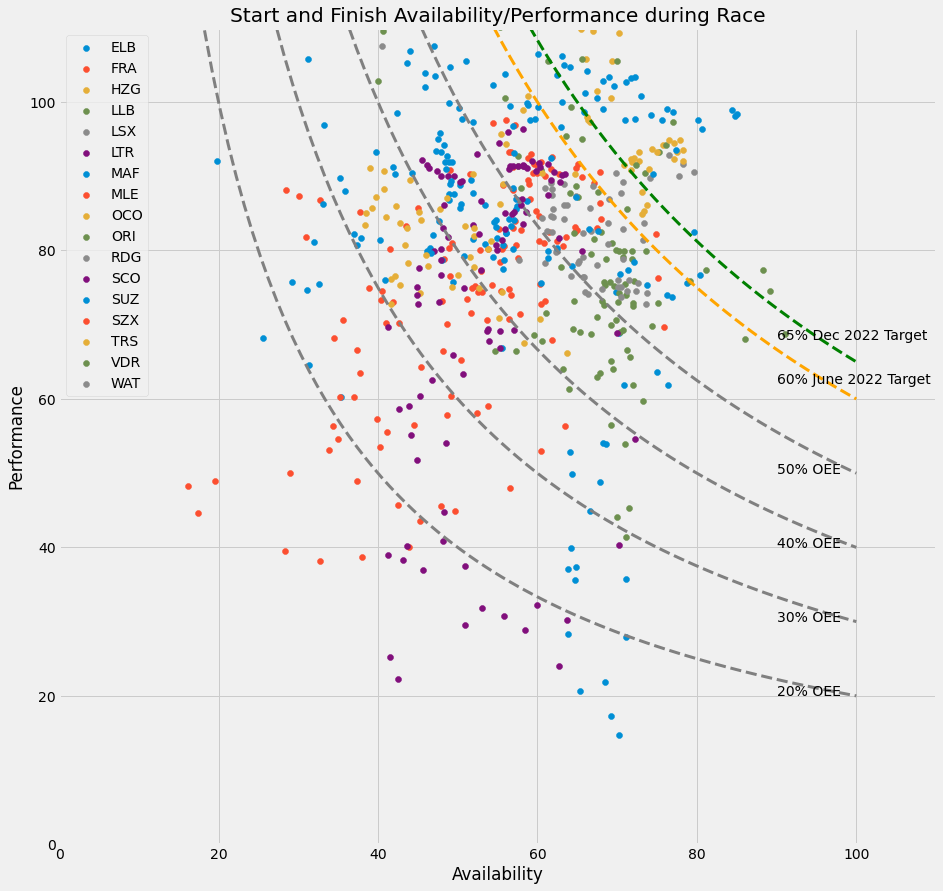

In [102]:
def oee_line(x, target):
    y = (target/x)
    return y

x = active_rolling['Availability %']
y = active_rolling['Performance %']
colors = active_rolling.Plant

plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,14))

# ['Line', 'Date', 'OEE %', 'Performance %', 'Availability %', 'Plant']
data = active_rolling.groupby('Plant')[['Availability %','Performance %']].rolling(window=4).mean().reset_index()

plt

for plant in data.Plant.unique():
    plt.scatter(data[data.Plant == plant]['Availability %'], data[data.Plant == plant]['Performance %'], label=plant)

    plt.xlim(0, 100)
    plt.ylim(0, 100)

plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 60), c='orange', lw=3, ls='--', label='_60% June 2022 Target')
plt.annotate(xy=(90,62), text='60% June 2022 Target')
plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 65), c='green', lw=3, ls='--', label='_65% December 2022 Target')
plt.annotate(xy=(90,68), text='65% Dec 2022 Target')
for pct in [20,30,40,50]:
    plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), pct), c='gray', lw=3, ls='--', label='_{}%'.format(pct))
    plt.annotate(xy=(90,pct), text='{}% OEE'.format(pct))
plt.xlim(0,110)
plt.ylim(0,110)
plt.xlabel('Availability')
plt.ylabel('Performance')
plt.legend()
plt.title('Start and Finish Availability/Performance during Race')

Text(0.5, 1.0, 'Rolling avg Availability/Performance since 2021-11-01')

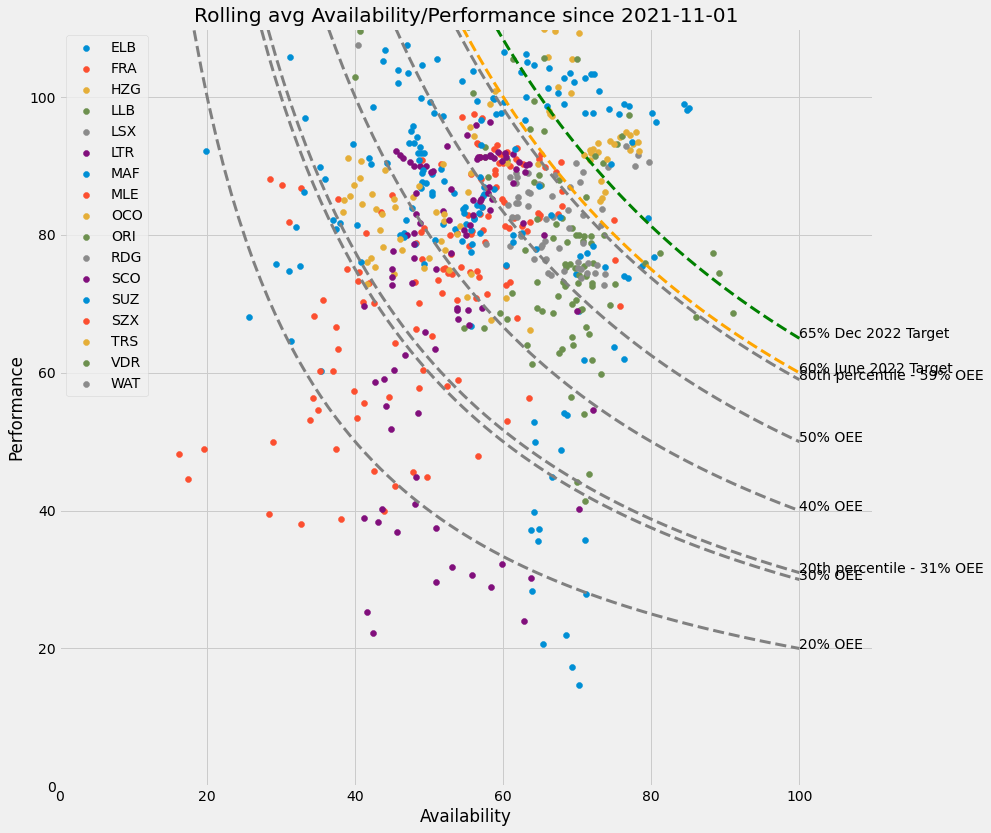

In [135]:
def oee_line(x, target):
    y = (target/x)
    return y

x = active_rolling['Availability %']
y = active_rolling['Performance %']
colors = active_rolling.Plant

plt.style.use('fivethirtyeight')

plt.figure(figsize=(13,13))

# ['Line', 'Date', 'OEE %', 'Performance %', 'Availability %', 'Plant']
data = active_rolling.groupby('Plant')[['Availability %','Performance %']].rolling(window=4).mean().reset_index()

plt

for plant in data.Plant.unique():
    plt.scatter(data[data.Plant == plant]['Availability %'], data[data.Plant == plant]['Performance %'], label=plant)

    plt.xlim(0, 100)
    plt.ylim(0, 100)

plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 60), c='orange', lw=3, ls='--', label='_60% June 2022 Target')
plt.annotate(xy=(100,60), text='60% June 2022 Target')
plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 65), c='green', lw=3, ls='--', label='_65% December 2022 Target')
plt.annotate(xy=(100,65), text='65% Dec 2022 Target')
for pct in [20,80]:
    pctl = int(np.percentile(active_rolling['OEE %'], pct))
    plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), pctl), c='gray', lw=3, ls='--', label='_{}%'.format(pctl))
    plt.annotate(xy=(100,pctl), text='{}th percentile - {}% OEE'.format(pct, pctl))
for pct in [20,30,40,50]:
    plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), pct), c='gray', lw=3, ls='--', label='_{}%'.format(pct))
    plt.annotate(xy=(100,pct), text='{}% OEE'.format(pct))
plt.xlim(0,110)
plt.ylim(0,110)
plt.xlabel('Availability')
plt.ylabel('Performance')
plt.legend()
plt.title('Rolling avg Availability/Performance since {}'.format(start_date))


In [132]:
active_rolling.groupby('Line')['OEE %'].value_counts()

Line                        OEE %    
WAT - LYO Packaging Line 9  16.698821    1
                            22.241672    1
                            26.462903    1
                            30.637254    1
                            33.505064    1
Name: OEE %, dtype: int64

In [16]:
x = active_rolling['Availability %']
y = active_rolling['Performance %']
z = active_rolling['OEE %']
colors = active_rolling.Plant

fig = px.scatter_3d(active_rolling, x=x, y=y, z=z
    , color='Plant'
    # , color = x
    , range_x=(0,100)
    , range_y=(0,100)
    , range_z=(0,100)
    , width=600
    , height=600
    , size=z*1.41
    , size_max=80
    , symbol='Plant')

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()



In [230]:
folder = 'OEE data'


file = ('Duration_of_Changeover.xlsx')

path = os.path.join(dir_sanofi_share, folder, file)
                    
df_duration = pd.read_excel(path,  parse_dates=['Calendar Day'])



In [236]:
race_site_list = [
'SCO - IMA C80/2',
'SCO - GAMMA1',
'MAF - C9 Packaging Line',
'FRA - Devices Pens, AL6',
'MAF - C2 Packaging Line',
'FRA - Devices Pens, AL5 Packaging 1',
'SUZ - LINE 01 - UHLMANN 1880',
'FRA - FF NLP, M22 Filling',
'TRS - L18 Packaging Line',
'SUZ - MEDISEAL PURAN',
'FRA - FF NLP, M21 Filling',
'TRS - L25 Packaging Line',
'LLB - IMA-2 Packaging (SOLD)',
'FRA - FF NLP, M18 Filling',
'LLB - Bosch-2 Packaging (SOLD)',
'LTR - C5 Packaging Line',
'LSX - SUPPO Packaging Line',
'LSX - TR200 Packaging Line'
]

In [248]:
race = df_duration[df_duration.Line.isin(race_site_list)]

In [255]:
race = race.merge(active_rolling, left_on=['Line','Calendar Day'], right_on=['Line', 'Date'])

In [257]:
race

,Line,Calendar Day,Duration (min),Date,OEE %,Performance %,Availability %,Plant
0,"FRA - Devices Pens, AL6",2021-11-21,01:06:09,2021-11-21,44.510369,73.440117,60.515781,FRA
1,"FRA - FF NLP, M21 Filling",2021-11-07,1900-01-01 00:00:00,2021-11-07,68.592390,92.049638,74.499964,FRA
2,"FRA - FF NLP, M21 Filling",2021-11-21,03:02:17,2021-11-21,59.883008,90.140194,65.459608,FRA
3,"FRA - FF NLP, M22 Filling",2021-11-07,1900-01-01 00:00:00,2021-11-07,57.828479,88.806964,64.781476,FRA


In [374]:
race

,Line,Calendar Day,Duration (min),Date,OEE %,Performance %,Availability %,Plant
0,"FRA - Devices Pens, AL6",2021-11-21,01:06:09,2021-11-21,44.510369,73.440117,60.515781,FRA
1,"FRA - FF NLP, M21 Filling",2021-11-07,1900-01-01 00:00:00,2021-11-07,68.592390,92.049638,74.499964,FRA
2,"FRA - FF NLP, M21 Filling",2021-11-21,03:02:17,2021-11-21,59.883008,90.140194,65.459608,FRA
3,"FRA - FF NLP, M22 Filling",2021-11-07,1900-01-01 00:00:00,2021-11-07,57.828479,88.806964,64.781476,FRA
